In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('~/Desktop/bhp.csv')

In [4]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [21]:
#data cleaning (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
df.isna().sum() #count na data in columns
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'

# Choose the column for which you want to apply bounds
column_name = 'price_per_sqft'

# Define the percentiles for lower and upper bounds
lower_bound_percentile = 0.001
upper_bound_percentile = 0.999

# Calculate the lower and upper bounds for the selected column
lower_bound = df[column_name].quantile(lower_bound_percentile)
upper_bound = df[column_name].quantile(upper_bound_percentile)

# Filter the dataset for the selected column to keep only the values within the bounds
df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Display the filtered DataFrame for the selected column
print(df.price_per_sqft.count() - df_filtered.price_per_sqft.count())
num_outliers = len(df) - len(df_filtered)

print(num_outliers)


28
28


In [35]:
print (df_filtered.price_per_sqft.std())
print(df_filtered.price_per_sqft.mean())
upper_limit = df_filtered.price_per_sqft.mean() + 4*df_filtered.price_per_sqft.std()
lower_limit=df_filtered.price_per_sqft.mean() - 4*df_filtered.price_per_sqft.std()
upper_limit, lower_limit

4141.020700174605
6663.6537351958705


(23227.73653589429, -9900.429065502549)

In [28]:
df_filtered[(df_filtered.price_per_sqft>upper_limit)|(df_filtered.price_per_sqft<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [34]:
df_filtered_no_outlier_std_dev = df_filtered[(df_filtered.price_per_sqft<upper_limit) & (df_filtered.price_per_sqft>lower_limit)]
df_filtered_no_outlier_std_dev.shape

(13047, 7)

In [38]:
from scipy.stats import norm
from matplotlib import pyplot as plt

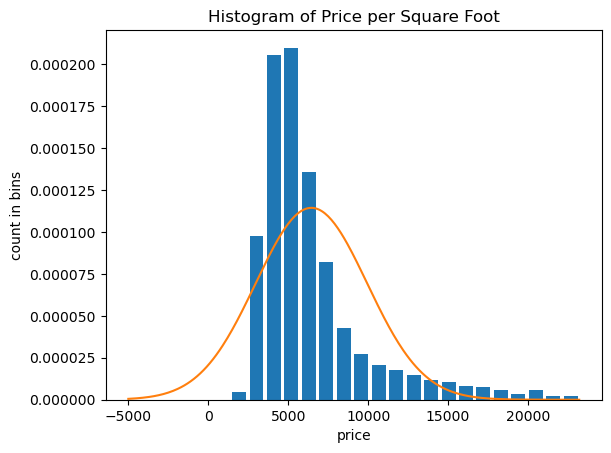

In [52]:
plt.hist(df_filtered_no_outlier_std_dev.price_per_sqft, bins= 20, rwidth= 0.8, density= True)
plt.xlabel('price')
plt.ylabel('count in bins')

plt.title('Histogram of Price per Square Foot')

# Plotting the probability density function (PDF) using a normal distribution


rng = np.arange(-5000, df_filtered_no_outlier_std_dev['price_per_sqft'].max(), 100)
plt.plot(rng, norm.pdf(rng, df_filtered_no_outlier_std_dev['price_per_sqft'].mean(), df_filtered_no_outlier_std_dev['price_per_sqft'].std()))

# Display the histogram and the PDF
plt.show()

In [56]:
df_filtered_no_outlier_std_dev['zscore']=( df_filtered_no_outlier_std_dev.price_per_sqft - df_filtered_no_outlier_std_dev.price_per_sqft.mean()) /df_filtered_no_outlier_std_dev.price_per_sqft.std()

/var/folders/6z/ncy_wsd14d118qw59ml4rfb00000gn/T/ipykernel_49343/3777246909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outlier_std_dev['zscore']=( df_filtered_no_outlier_std_dev.price_per_sqft - df_filtered_no_outlier_std_dev.price_per_sqft.mean()) /df_filtered_no_outlier_std_dev.price_per_sqft.std()


In [57]:
df_filtered_no_outlier_std_dev.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601


In [68]:
df3 = df_filtered_no_outlier_std_dev
outliers_z = df3[(df3.zscore < -4) | (df3.zscore>4)]

outliers_z.shape

(86, 8)

In [66]:
#df3 no outliers 
df3 =df3[(df3.zscore>-4) & (df3.zscore<4)]

df3.shape

(12961, 8)